# Recognition of Tamil Actors using SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [6]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [7]:
Chris=os.listdir("C:/Users/Eeshwar Prasath/Downloads/images/actors/Chris")

In [8]:
Jayam=os.listdir("C:/Users/Eeshwar Prasath/Downloads/images/actors/Jayam")

In [9]:
Vikram=os.listdir("C:/Users/Eeshwar Prasath/Downloads/images/actors/Vikram")

In [10]:
limit=10
chris_images=[None]*limit
j=0
for i in Chris:
    if(j<limit):
        chris_images[j]=imread("C:/Users/Eeshwar Prasath/Downloads/images/actors/Chris/"+i)
        j+=1
    else:
        break

In [16]:
limit=10
vikram_images=[None]*limit
j=0
for i in Vikram:
    if(j<limit):
        vikram_images[j]=imread("C:/Users/Eeshwar Prasath/Downloads/images/actors/Vikram/"+i)
        j+=1
    else:
        break

In [17]:
limit=10
jayam_images=[None]*limit
j=0
for i in Jayam:
    if(j<limit):
        jayam_images[j]=imread("C:/Users/Eeshwar Prasath/Downloads/images/actors/Jayam/"+i)
        j+=1
    else:
        break

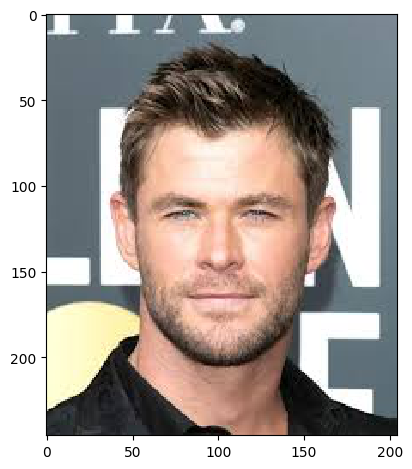

In [18]:
imshow(chris_images[1])

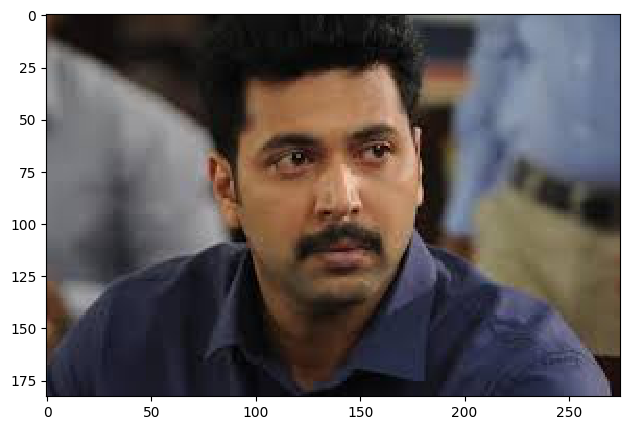

In [19]:
imshow(jayam_images[1])

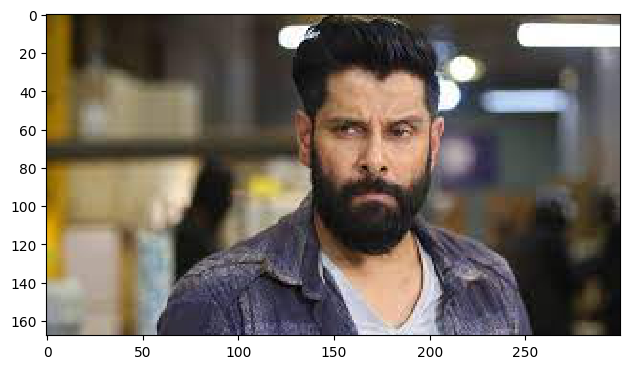

In [20]:
imshow(vikram_images[1])

In [21]:
vikram_images[3].shape

(126, 151, 3)

# Convert Color to Gray
rgb2gray

In [23]:
chris_gray=[None]*limit
j=0
for i in Chris:
    if(j<limit):
        chris_gray[j]=rgb2gray(chris_images[j])
        j+=1
    else:
        break

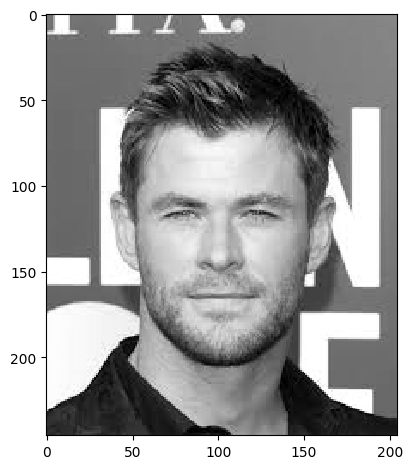

In [24]:
imshow(chris_gray[1])

In [25]:
jayam_gray=[None]*limit
j=0
for i in Jayam:
    if(j<limit):
        jayam_gray[j]=rgb2gray(jayam_images[j])
        j+=1
    else:
        break

In [26]:
vikram_gray=[None]*limit
j=0
for i in Vikram:
    if(j<limit):
        vikram_gray[j]=rgb2gray(vikram_images[j])
        j+=1
    else:
        break

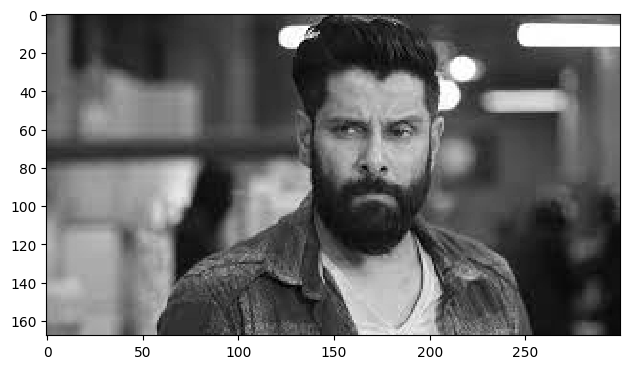

In [27]:
imshow(vikram_gray[1])

In [28]:
vikram_gray[3].shape

(126, 151)

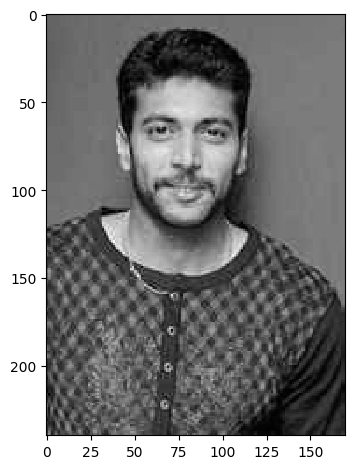

In [29]:
imshow(jayam_gray[7])

In [30]:
for j in range(10):
    c=chris_gray[j]
    chris_gray[j]=resize(c,(512,512))

In [31]:
for j in range(10):
    c=jayam_gray[j]
    jayam_gray[j]=resize(c,(512,512))

In [32]:
for j in range(10):
    c=vikram_gray[j]
    vikram_gray[j]=resize(c,(512,512))

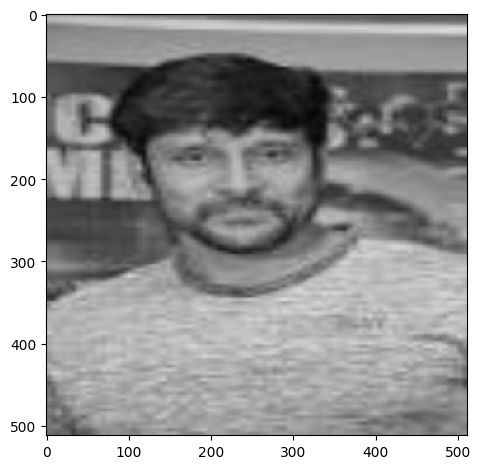

In [33]:
imshow(vikram_gray[2])

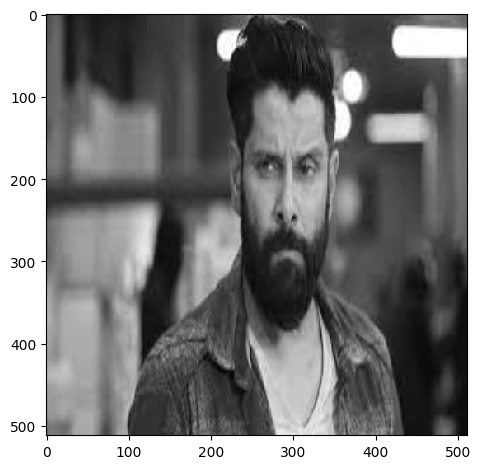

In [34]:
imshow(vikram_gray[1])

In [35]:
vikram_gray[3].shape

(512, 512)

# Image Matrix to Vector Conversion

In [48]:
len_of_images_chris=len(chris_gray)
len_of_images_jayam=len(jayam_gray)
len_of_images_vikram=len(vikram_gray)

In [127]:
len_of_images_chris

10

In [38]:
image_size_chris=chris_gray[1].shape

In [39]:
image_size_chris

(512, 512)

In [40]:
image_size_vikram=chris_gray[1].shape
image_size_jayam=jayam_gray[1].shape

# Create a variable flatten size which contains product of (512,512)

In [63]:
flatten_size_chris=image_size_chris[0]*image_size_chris[1]
flatten_size_jayam=image_size_jayam[0]*image_size_jayam[1]
flatten_size_vikram=image_size_vikram[0]*image_size_vikram[1]

In [45]:
flatten_size_chris

262144

# Now flatten image from 512,512 matrix to 266144,1 vector

In [73]:
for i in range(len_of_images_chris):
    chris_gray[i]=np.ndarray.flatten(chris_gray[i]).reshape(flatten_size_chris,1)

ValueError: could not broadcast input array from shape (262144,1) into shape (262144,)

In [51]:
chris_gray=np.dstack(chris_gray)

In [52]:
chris_gray[0].shape

(10, 262144)

In [77]:
chris_gray=np.rollaxis(chris_gray,axis=2,start=0)

AxisError: axis 2 is out of bounds for array of dimension 2

In [75]:
chris_gray.shape

(10, 262144)

In [57]:
chris_gray=chris_gray.reshape(len_of_images_chris,flatten_size_chris)

In [58]:
chris_data=pd.DataFrame(chris_gray)

In [59]:
chris_gray

array([[0.64999254, 0.65051337, 0.65273457, ..., 0.69763708, 0.69763708,
        0.69763708],
       [0.47519327, 0.47893351, 0.47141637, ..., 0.11903044, 0.12019273,
        0.11961442],
       [0.09234663, 0.09390913, 0.09076881, ..., 0.12896581, 0.13210613,
        0.13054363],
       ...,
       [0.36728039, 0.36728039, 0.36728039, ..., 0.08777797, 0.09091828,
        0.08935578],
       [1.        , 1.        , 1.        , ..., 0.36722235, 0.37825412,
        0.37521425],
       [0.80278733, 0.80203277, 0.80314139, ..., 0.0714353 , 0.06976141,
        0.07090071]])

In [60]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.701872,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.109739,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.108484,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.082854,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.629808,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.074121,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.315693,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.089860,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901


In [61]:
chris_data["label"]="chris"

In [62]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637,chris
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614,chris
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544,chris
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946,chris
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901,chris


In [78]:
for i in range(len_of_images_jayam):
    jayam_gray[i]=np.ndarray.flatten(jayam_gray[i]).reshape(flatten_size_jayam,1)

In [79]:
for i in range(len_of_images_vikram):
    vikram_gray[i]=np.ndarray.flatten(vikram_gray[i]).reshape(flatten_size_vikram,1)

In [80]:
jayam_gray=np.dstack(jayam_gray)

In [81]:
vikram_gray=np.dstack(vikram_gray)

In [83]:
jayam_gray=np.rollaxis(jayam_gray,axis=2,start=0)

In [84]:
vikram_gray=np.rollaxis(vikram_gray,axis=2,start=0)

In [85]:
jayam_gray=jayam_gray.reshape(len_of_images_jayam,flatten_size_jayam)

In [86]:
vikram_gray=vikram_gray.reshape(len_of_images_vikram,flatten_size_vikram)

In [87]:
jayam_data=pd.DataFrame(jayam_gray)

In [88]:
vikram_data=pd.DataFrame(vikram_gray)

In [89]:
jayam_data["label"]="jayam"

In [90]:
vikram_data["label"]="vikram"

In [91]:
actor=pd.concat([chris_data,jayam_data,vikram_data])

In [92]:
actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637,chris
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614,chris
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544,chris
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946,chris
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901,chris


In [93]:
#Shuffling within DataFrame

In [94]:
from sklearn.utils import shuffle

In [95]:
actors_indexed=shuffle(actor).reset_index()

In [96]:
actors_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
1,6,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,...,0.434999,0.446028,0.387756,0.327095,0.349153,0.387756,0.395477,0.389962,0.390698,vikram
2,8,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726,vikram
3,2,0.642612,0.643013,0.643414,0.643452,0.643051,0.642650,0.642249,0.641848,0.641447,...,0.542223,0.542688,0.543153,0.543618,0.544083,0.544548,0.544504,0.544039,0.543574,vikram
4,3,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,...,0.726277,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,jayam
5,7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
6,5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
7,2,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,...,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160,jayam
8,4,0.887797,0.873691,0.872795,0.886902,0.901008,0.915114,0.914461,0.892104,0.869746,...,0.297561,0.297076,0.296590,0.296394,0.296394,0.296394,0.296394,0.296394,0.296394,vikram
9,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris


In [101]:
actors=actors_indexed

In [102]:
actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
1,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,...,0.434999,0.446028,0.387756,0.327095,0.349153,0.387756,0.395477,0.389962,0.390698,vikram
2,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726,vikram
3,0.642612,0.643013,0.643414,0.643452,0.643051,0.642650,0.642249,0.641848,0.641447,0.640990,...,0.542223,0.542688,0.543153,0.543618,0.544083,0.544548,0.544504,0.544039,0.543574,vikram
4,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,...,0.726277,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,jayam
5,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
6,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
7,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,0.209380,...,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160,jayam
8,0.887797,0.873691,0.872795,0.886902,0.901008,0.915114,0.914461,0.892104,0.869746,0.847389,...,0.297561,0.297076,0.296590,0.296394,0.296394,0.296394,0.296394,0.296394,0.296394,vikram
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris


In [105]:
actors.to_csv("C:/Users/Eeshwar Prasath/Downloads/images/actors.csv")

In [107]:
x=actors.values[:,:-1]
y=actors.values[:,-1]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [111]:
from sklearn import svm

In [112]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [113]:
y_pred=clf.predict(x_test)
y_pred

array(['jayam', 'jayam', 'vikram', 'chris', 'jayam', 'chris'],
      dtype=object)

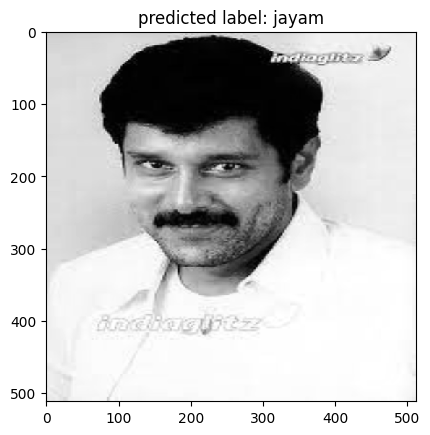

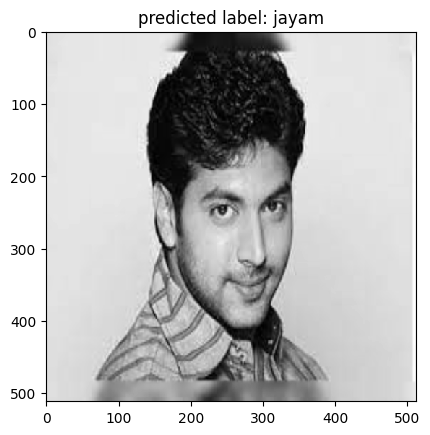

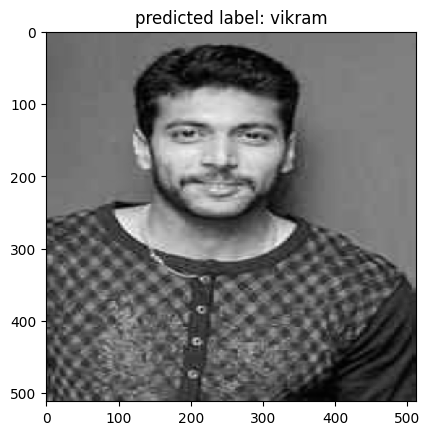

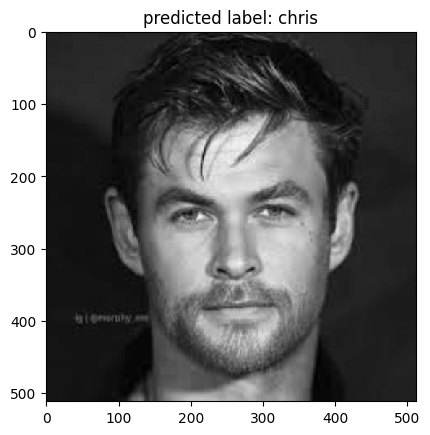

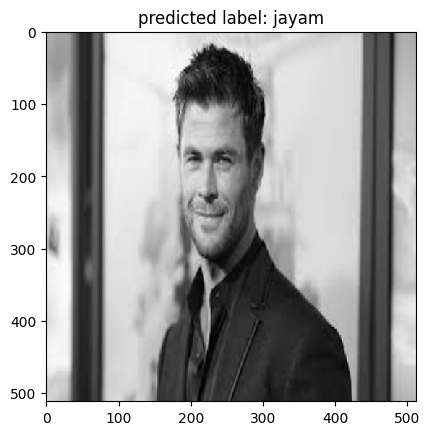

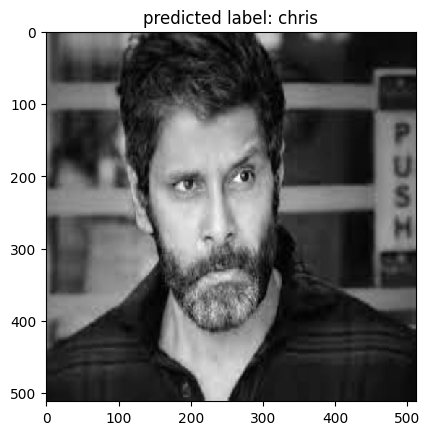

In [121]:
for i in range(6):
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [122]:
from sklearn import metrics

In [123]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [124]:
accuracy

0.3333333333333333

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test,y_pred)

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 0]], dtype=int64)